<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/tmpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package & Data, model Load

    - eli5 : 머신러닝 모델 설명(Explain Like I am 5)
    - pdpbox : partial dependence plot 학습 모델 설명 및 시각화
    - lime   : 학습한 결과를 대리분석으로 설명

In [1]:
! pip install eli5
! pip install pdpbox
! pip install lime

  [머신러닝 모델, 데이터셋을 저장, 불러오기 방법]

  ____
  1. 외부 모델 저장 후, 불러오기
  2. 나의 모델 저장 후, 불러오기
  3. 세션 내에서 학습시킨 모델 이용하기.


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle      ## 데이터 모델 저장, 불러오기
import gzip        ## 파일압축, 풀기

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
# ML model
datapath = 'https://github.com/mchoimis/financialML/raw/main/xai/'

```
모델 및 데이터 설명
 - data00 : 이진분류용 데이터
 - data01 : 다중분류용 데이터
 - logreg : Logistic Regression Classifier( 00 )
 - rfc    : Random Forest Classifier ( 00, 01 )
 - gbc    : Gradient Boosting Classifier ( 00 )
 - lgbm   : LightGBM Classifier (00, 01 )
```

In [10]:
import os

In [11]:
# Get present working Directory
! pwd

/content


In [12]:
# Create New Folder
! mkdir financialml

In [16]:
# 저장한 데이터와 모델 불러오기

modelpath = '/content/financialml/'
with gzip.open(modelpath + 'data00.pickle', 'rb') as f:
    data00 = pickle.load(f)
with gzip.open(modelpath + 'data00_X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)
with gzip.open(modelpath + 'data00_y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open(modelpath + 'data00_y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

## Interpretation Logistic Regression model's coef

In [14]:
# 로지스틱 모델 회귀계수 해석
# 이진분류 모델 불러오기
with open(modelpath + 'logreg00.pkl', 'rb') as file :
    logreg = pickle.load(file)

In [17]:
X_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [18]:
logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [19]:
# Change the shape
coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

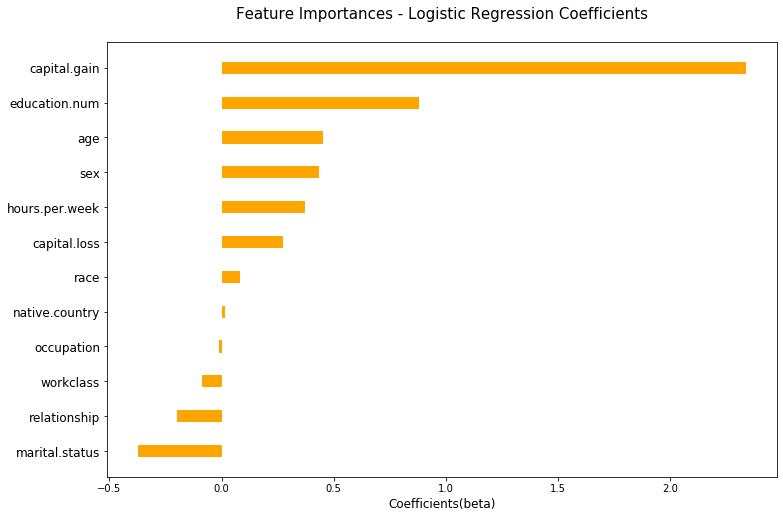

In [20]:
# Visualization

indices = np.argsort(coef)

plt.figure(figsize=(12,8))
plt.barh(X_test.columns, coef[indices],
         .35,
         color = 'orange',
         align = 'center')
plt.yticks(X_test.columns, X_test.columns[indices],
           fontsize=12)
plt.xlabel('Coefficients(beta)', fontsize = 12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', 
          fontsize = 15)
plt.show()